# Content-Based Recommendation Engine

This recommendation engine takes in a seed track and outputs track recommendations based on similarity measures

In [113]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [114]:
#read data
chart_tracks_df= pd.read_csv("BTS_spotify_daily_charts_tracks_predicted_genres.csv")
chart_tracks_df = chart_tracks_df.fillna(0)
opm = pd.read_csv('OPM_spotify_daily_charts_tracks_predicted_genres.csv')

chart_tracks_df = pd.concat([chart_tracks_df,opm]).reset_index()

#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df

,index,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob,playlist_id,playlist_name
0,0,6QBZlIxCB2lAPU2bM1ut1p,Dynamite - Instrumental,3Nrfpe0tUJi4K4DXYWgMUX,BTS,3zWmE5c3alhuoPLphxjMVd,198770,2020-08-21,29,0.861,...,0.6250,0.377977,0,electronic,0.98,1.000000,0.000000,0.000000,NaN,NaN
1,1,1HZ5LJMCzClg2pdomCnEPw,Dynamite - EDM Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2UX7xCHxzTLKuEom7VdwMJ,198939,2020-08-24,23,0.707,...,0.3180,0.433263,0,electronic,0.96,0.964286,0.035714,0.000000,NaN,NaN
2,2,5raJ9QoZOdoRZ1MZOcygkR,INTRO : Calling,3Nrfpe0tUJi4K4DXYWgMUX,BTS,1nScVw87kRJiT2bg2Kswhp,84613,2020-07-14,58,0.486,...,0.0806,0.568675,0,electronic,0.96,0.964286,0.000000,0.035714,NaN,NaN
3,3,0usLRFLmYXYahKNgXxsuJc,Trivia 起 : Just Dance,3Nrfpe0tUJi4K4DXYWgMUX,BTS,2lATw9ZAVp7ILQcOKPCPqp,225220,2018-08-24,68,0.723,...,0.3980,0.445778,0,electronic,0.82,0.821429,0.178571,0.000000,NaN,NaN
4,4,2JZPlXE8c0oLZoCsqFFmgo,Dynamite - Poolside Remix,3Nrfpe0tUJi4K4DXYWgMUX,BTS,6K4chJALBBMYmXjwgvqahx,182591,2020-08-28,60,0.686,...,0.4060,0.438954,0,electronic,0.78,0.785714,0.214286,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1213,4EFinQKVMVKnPqIU6RZbWO,Mga Kababayan,1ayiGn4MLc427PozR13p1y,FrancisM,1XqiSs5j7RV7kYVPhZCRmX,322040,2009,38,0.743,...,0.5840,0.280820,2,rnb,0.36,0.035714,0.785714,0.178571,4EFinQKVMVKnPqIU6RZbWO,4EFinQKVMVKnPqIU6RZbWO
1317,1214,4f2N5TmeBDDHjBuuGUgFF7,The Yes Yes Show,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,3O938XtV5tBLuV4CiW55ys,292093,2004,44,0.608,...,0.6010,0.329108,0,electronic,0.36,0.500000,0.321429,0.178571,4f2N5TmeBDDHjBuuGUgFF7,4f2N5TmeBDDHjBuuGUgFF7
1318,1215,4VgrLYLervdW5bvAlnUmOK,Walang Hanggan,1YHVP6devH4bmmBZp8g8SC,Don Barredo,1PLAlskgtSaOEZHRiCEIr3,253714,2020-06-05,15,0.782,...,0.5050,0.566880,2,rnb,0.36,0.357143,0.392857,0.250000,4VgrLYLervdW5bvAlnUmOK,4VgrLYLervdW5bvAlnUmOK
1319,1216,63AWRNGp5CdVF9EHyb945T,Picture Mo Inday,3oP7ApvM9dvIXP6AufxCxt,Grin Department,5OwcI85oeyGW11qnOPBG4a,183933,2009-10-15,0,0.867,...,0.9610,0.513429,2,rnb,0.36,0.214286,0.428571,0.357143,63AWRNGp5CdVF9EHyb945T,63AWRNGp5CdVF9EHyb945T


In [115]:
chart_tracks_df.describe()

,index,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob
count,1321.000000,1.321000e+03,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,565.031037,2.517736e+05,34.811506,0.547228,0.504984,5.330053,0.672125,0.856170,0.052878,0.430849,0.010057,0.160162,0.407988,0.449087,1.006056,0.613823,0.261166,0.510355,0.228480
std,369.464789,5.357927e+04,22.228770,0.137111,0.217482,3.533830,0.150546,0.351051,0.056276,0.309086,0.065609,0.117019,0.206661,0.189302,0.445475,0.122638,0.221117,0.168039,0.162152
min,0.000000,7.650600e+04,0.000000,0.144000,0.040300,0.000000,0.000000,0.000000,0.023200,0.000037,0.000000,0.030600,0.046700,0.000000,0.000000,0.340000,0.000000,0.000000,0.000000
25%,227.000000,2.194930e+05,21.000000,0.458000,0.331000,2.000000,0.583059,1.000000,0.030200,0.132000,0.000000,0.095600,0.241000,0.286034,1.000000,0.520000,0.071429,0.392857,0.107143
50%,557.000000,2.468160e+05,38.000000,0.554000,0.478000,6.000000,0.695160,1.000000,0.035300,0.423000,0.000001,0.117000,0.373000,0.470872,1.000000,0.620000,0.214286,0.500000,0.214286
75%,887.000000,2.797610e+05,50.000000,0.643000,0.679000,9.000000,0.782149,1.000000,0.050300,0.727000,0.000049,0.176000,0.548000,0.567134,1.000000,0.700000,0.428571,0.642857,0.321429
max,1217.000000,1.037586e+06,100.000000,0.890000,0.972000,11.000000,1.000000,1.000000,0.884000,0.981000,0.870000,0.955000,0.978000,1.000000,2.000000,1.000000,1.000000,0.964286,0.785714


In [116]:
chart_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1321 non-null   int64  
 1   track_id                   1321 non-null   object 
 2   track_name                 1321 non-null   object 
 3   artist_id                  1321 non-null   object 
 4   artist_name                1321 non-null   object 
 5   album_id                   1321 non-null   object 
 6   duration                   1321 non-null   int64  
 7   release_date               1321 non-null   object 
 8   popularity                 1321 non-null   int64  
 9   danceability               1321 non-null   float64
 10  energy                     1321 non-null   float64
 11  key                        1321 non-null   int64  
 12  loudness                   1321 non-null   float64
 13  mode                       1321 non-null   int64

## 2. Input Seed Track


In [117]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [118]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=='Heartbeat'].iloc[0]
seed_track_data[feature_cols]

danceability           0.476
energy                 0.581
loudness            0.632753
speechiness             0.12
acousticness           0.523
instrumentalness           0
liveness               0.201
valence                0.282
tempo               0.473769
Name: 5, dtype: object

## 3. Explore Similarity Measures

In [119]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity


##### Use audio features only

Euclidean

In [120]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
704,Pare Ko,Eraserheads,0.000,pop,0.476,0.617,0.727671,0.0278,0.320,0.00000,0.0560,0.4620,0.596415
810,Maling Tadhana,Lapis,0.000,electronic,0.476,0.842,0.809543,0.0405,0.149,0.36100,0.1500,0.3510,0.535935
502,You First Believed,Tres Hermanas,0.001,pop,0.477,0.410,0.766027,0.0282,0.730,0.00000,0.0892,0.4420,0.643230
111,Tagpuan - Duet Version,Moira Dela Torre,0.001,pop,0.477,0.202,0.627306,0.0314,0.788,0.00052,0.0861,0.2720,0.511855
141,Matulog ka na,Clayson,0.001,pop,0.475,0.157,0.436986,0.0307,0.785,0.00212,0.1070,0.0806,0.438417
288,Araw-Araw,Ben&Ben,0.001,pop,0.475,0.424,0.690046,0.0295,0.582,0.00000,0.2340,0.2240,0.572692
312,Your Universe - Acoustic,Rico Blanco,0.001,pop,0.475,0.253,0.548904,0.0294,0.691,0.00000,0.1060,0.3470,0.234917
535,Imaginary Love,Bea Lorenzo,0.001,pop,0.475,0.268,0.501233,0.1620,0.820,0.00000,0.1150,0.2080,0.100769
863,Magkasuyo Buong Gabi,Agsunta,0.001,pop,0.475,0.451,0.827580,0.0410,0.635,0.00000,0.3820,0.3430,0.140808
743,I Need You More Today,Caleb Santos,0.002,pop,0.474,0.522,0.730091,0.0408,0.360,0.00000,0.1230,0.4480,0.676724


Manhattan

In [121]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
704,Pare Ko,Eraserheads,0.000,pop,0.476,0.617,0.727671,0.0278,0.32000,0.00000,0.0560,0.4620,0.596415
810,Maling Tadhana,Lapis,0.000,electronic,0.476,0.842,0.809543,0.0405,0.14900,0.36100,0.1500,0.3510,0.535935
312,Your Universe - Acoustic,Rico Blanco,0.001,pop,0.475,0.253,0.548904,0.0294,0.69100,0.00000,0.1060,0.3470,0.234917
863,Magkasuyo Buong Gabi,Agsunta,0.001,pop,0.475,0.451,0.827580,0.0410,0.63500,0.00000,0.3820,0.3430,0.140808
535,Imaginary Love,Bea Lorenzo,0.001,pop,0.475,0.268,0.501233,0.1620,0.82000,0.00000,0.1150,0.2080,0.100769
502,You First Believed,Tres Hermanas,0.001,pop,0.477,0.410,0.766027,0.0282,0.73000,0.00000,0.0892,0.4420,0.643230
141,Matulog ka na,Clayson,0.001,pop,0.475,0.157,0.436986,0.0307,0.78500,0.00212,0.1070,0.0806,0.438417
111,Tagpuan - Duet Version,Moira Dela Torre,0.001,pop,0.477,0.202,0.627306,0.0314,0.78800,0.00052,0.0861,0.2720,0.511855
288,Araw-Araw,Ben&Ben,0.001,pop,0.475,0.424,0.690046,0.0295,0.58200,0.00000,0.2340,0.2240,0.572692
1108,Huling Sayaw,Kamikazee,0.002,pop,0.474,0.871,0.889909,0.0405,0.00125,0.00000,0.2020,0.5450,0.548466


Cosine

In [122]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
515,Dulo Ng Hangganan,IV Of Spades,0.008330,pop,0.565,0.565,0.684110,0.0368,0.494,0.002620,0.1270,0.350,0.541710
282,The Day You Said Goodnight,Hale,0.011279,pop,0.556,0.524,0.745251,0.0313,0.508,0.000000,0.1060,0.310,0.531034
864,Tunay Na Pag-Ibig,Don Barredo,0.011364,pop,0.491,0.630,0.844429,0.0472,0.716,0.000003,0.2020,0.273,0.693774
962,Mahal Ba Ako Ng Mahal Ko,Kaye Cal,0.011526,pop,0.621,0.680,0.771142,0.0623,0.563,0.000000,0.1190,0.472,0.490031
178,The Day You Said Goodnight,Hale,0.011594,pop,0.558,0.553,0.768630,0.0323,0.492,0.000000,0.1160,0.251,0.530371
232,Masyado Pang Maaga,Ben&Ben,0.011796,pop,0.526,0.571,0.749361,0.0295,0.458,0.000000,0.1100,0.310,0.567262
225,breeze,HNH,0.012233,pop,0.493,0.578,0.822329,0.0948,0.526,0.000000,0.1260,0.248,0.629374
333,Sampaguita,juan karlos,0.012700,pop,0.562,0.708,0.743516,0.0539,0.457,0.000004,0.0878,0.347,0.592221
8,Blue & Grey,BTS,0.013048,pop,0.547,0.605,0.716274,0.0415,0.420,0.000000,0.1250,0.364,0.426913
551,Stars,BRWN,0.013197,pop,0.524,0.594,0.716530,0.0382,0.705,0.000021,0.1320,0.208,0.617194


View histograms of the 3 similarity measures

array([[<AxesSubplot:title={'center':'euclidean_dist'}>,
        <AxesSubplot:title={'center':'manhattan_dist'}>],
       [<AxesSubplot:title={'center':'cosine_dist'}>, <AxesSubplot:>]],
      dtype=object)

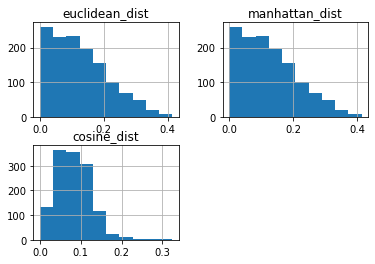

In [123]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [124]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

<ipython-input-124-3525b1bc5e04>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
515,Dulo Ng Hangganan,IV Of Spades,0.008330,pop,0.565,0.565,0.684110,0.0368,0.494,0.002620,0.1270,0.350,0.541710
282,The Day You Said Goodnight,Hale,0.011279,pop,0.556,0.524,0.745251,0.0313,0.508,0.000000,0.1060,0.310,0.531034
864,Tunay Na Pag-Ibig,Don Barredo,0.011364,pop,0.491,0.630,0.844429,0.0472,0.716,0.000003,0.2020,0.273,0.693774
962,Mahal Ba Ako Ng Mahal Ko,Kaye Cal,0.011526,pop,0.621,0.680,0.771142,0.0623,0.563,0.000000,0.1190,0.472,0.490031
178,The Day You Said Goodnight,Hale,0.011594,pop,0.558,0.553,0.768630,0.0323,0.492,0.000000,0.1160,0.251,0.530371
232,Masyado Pang Maaga,Ben&Ben,0.011796,pop,0.526,0.571,0.749361,0.0295,0.458,0.000000,0.1100,0.310,0.567262
225,breeze,HNH,0.012233,pop,0.493,0.578,0.822329,0.0948,0.526,0.000000,0.1260,0.248,0.629374
333,Sampaguita,juan karlos,0.012700,pop,0.562,0.708,0.743516,0.0539,0.457,0.000004,0.0878,0.347,0.592221
8,Blue & Grey,BTS,0.013048,pop,0.547,0.605,0.716274,0.0415,0.420,0.000000,0.1250,0.364,0.426913
551,Stars,BRWN,0.013197,pop,0.524,0.594,0.716530,0.0382,0.705,0.000021,0.1320,0.208,0.617194


###### Audio features and genre probabilities

In [136]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
chart_tracks_df['cosine_dist_mod'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod')
recommendation_df[['track_name','artist_name','cosine_dist_mod','predicted_genre']+cols]

,track_name,artist_name,cosine_dist_mod,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_electronic_prob,predicted_pop_prob,predicted_rnb_prob
282,The Day You Said Goodnight,Hale,0.008132,pop,0.556,0.524,0.745251,0.0313,0.50800,0.000000,0.1060,0.3100,0.531034,0.000000,0.857143,0.142857
389,Ipagpatawad,Janno Gibbs,0.014139,pop,0.533,0.476,0.565982,0.0272,0.58700,0.001330,0.0617,0.3200,0.553367,0.035714,0.785714,0.178571
410,Kung Ako Na Lang Sana,Kaye Cal,0.015222,pop,0.596,0.411,0.722968,0.0292,0.59200,0.000000,0.2740,0.2070,0.464224,0.000000,0.892857,0.107143
243,Starting over Again,Toni Gonzaga,0.017818,pop,0.535,0.441,0.777215,0.0293,0.47400,0.000001,0.1080,0.2560,0.437588,0.107143,0.821429,0.071429
509,Maybe This Time,Toto Sorioso,0.019575,pop,0.622,0.399,0.708128,0.0269,0.49600,0.000004,0.0929,0.2240,0.516043,0.000000,0.928571,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Vie (Sabihin Mo Kung),NOBITA,0.384446,pop,0.686,0.271,0.623014,0.0346,0.45800,0.000012,0.1340,0.1290,0.483486,0.964286,0.035714,0.000000
830,Buwan,juan karlos,0.391618,rnb,0.631,0.381,0.533973,0.0400,0.44700,0.000171,0.0902,0.3600,0.477756,1.000000,0.000000,0.000000
1,Dynamite - EDM Remix,BTS,0.393506,electronic,0.707,0.838,0.799099,0.0599,0.00190,0.444000,0.0961,0.3180,0.433263,0.964286,0.035714,0.000000
2,INTRO : Calling,BTS,0.431491,electronic,0.486,0.610,0.498956,0.0348,0.58200,0.791000,0.1440,0.0806,0.568675,0.964286,0.000000,0.035714


In [149]:
pop_df = recommendation_df.sort_values(by=['predicted_genre_prob','loudness', 'acousticness', 'energy', 'instrumentalness'], ascending = False)
pop_df[['artist_name','track_name', 'predicted_genre', 'predicted_genre_prob']].head(50)

,artist_name,track_name,predicted_genre,predicted_genre_prob
103,Joko Reantaso,Rewind,electronic,1.00
0,BTS,Dynamite - Instrumental,electronic,0.98
1,BTS,Dynamite - EDM Remix,electronic,0.96
2,BTS,INTRO : Calling,electronic,0.96
105,Unique Salonga,Midnight Sky,pop,0.88
104,Keiko Necesario,Let Me Be The One,pop,0.88
109,Hale,The Day You Said Goodnight - Acoustic Version,pop,0.88
111,Moira Dela Torre,Tagpuan - Duet Version,pop,0.88
108,Leanne & Naara,Alapaap,pop,0.88
110,Patch Quiwa,Kaya Pala,pop,0.88


In [146]:
pop_df.to_csv('opm_song_list_.csv')

In [134]:
recommendation_df['track_id'].values

array(['57SGNDTRH3UeQ22qbrS4fH', '6Zj3BPdOPcVg6IOLoCZeTG',
       '0aNo7WxKsEtoJLx6U423Yt', ..., '1HZ5LJMCzClg2pdomCnEPw',
       '5raJ9QoZOdoRZ1MZOcygkR', '6QBZlIxCB2lAPU2bM1ut1p'], dtype=object)